# My Story #

Required import statements

In [248]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data loading into dataframes

In [249]:
data_udata = pd.read_table('/home/user/Downloads/Movie lens/ml-100k/u.data', header = None, 
                           delim_whitespace=True)
data_udata.columns = ['User_id', 'Item ID', 'Rating', 'Timestamp']

data_uuser = pd.read_table('/home/user/Downloads/Movie lens/ml-100k/u.user', header = None, sep="|")
data_uuser.columns = ['User_id', 'Age', 'Gender', 'Profession','Zipcode']

data_uitem=pd.read_table('/home/user/Downloads/Movie lens/ml-100k/u.item', header = None, sep="|", 
                         encoding="ISO-8859-1")
data_uitem.columns = ['Item ID', 'movie_title', 'release_date', 'video_release_date', 'IMDb URL', 'unknown',
                    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                    'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'thriller', 
                    'War', 'Western']


## Total rating count for all movies released in a particular year ##

Dropping unnecessary columns and merging the dataframes for required dataset

In [250]:
udata = data_udata
udata.drop('Timestamp', axis=1, inplace=True)
uuser = data_uuser
uuser.drop('Zipcode', axis=1, inplace=True)
temp= pd.merge(udata, uuser, on='User_id', how='outer')
uitem=data_uitem
uitem.drop(['movie_title', 'video_release_date', 'IMDb URL'], axis=1, inplace=True)
final = pd.merge(temp,uitem, on='Item ID', how='outer')

Isolating the year of release from the dataframe

In [251]:
final['release_date']=pd.to_datetime(final.release_date)
final['Year'] = final.release_date.dt.year

Year of release vs Total rating counts

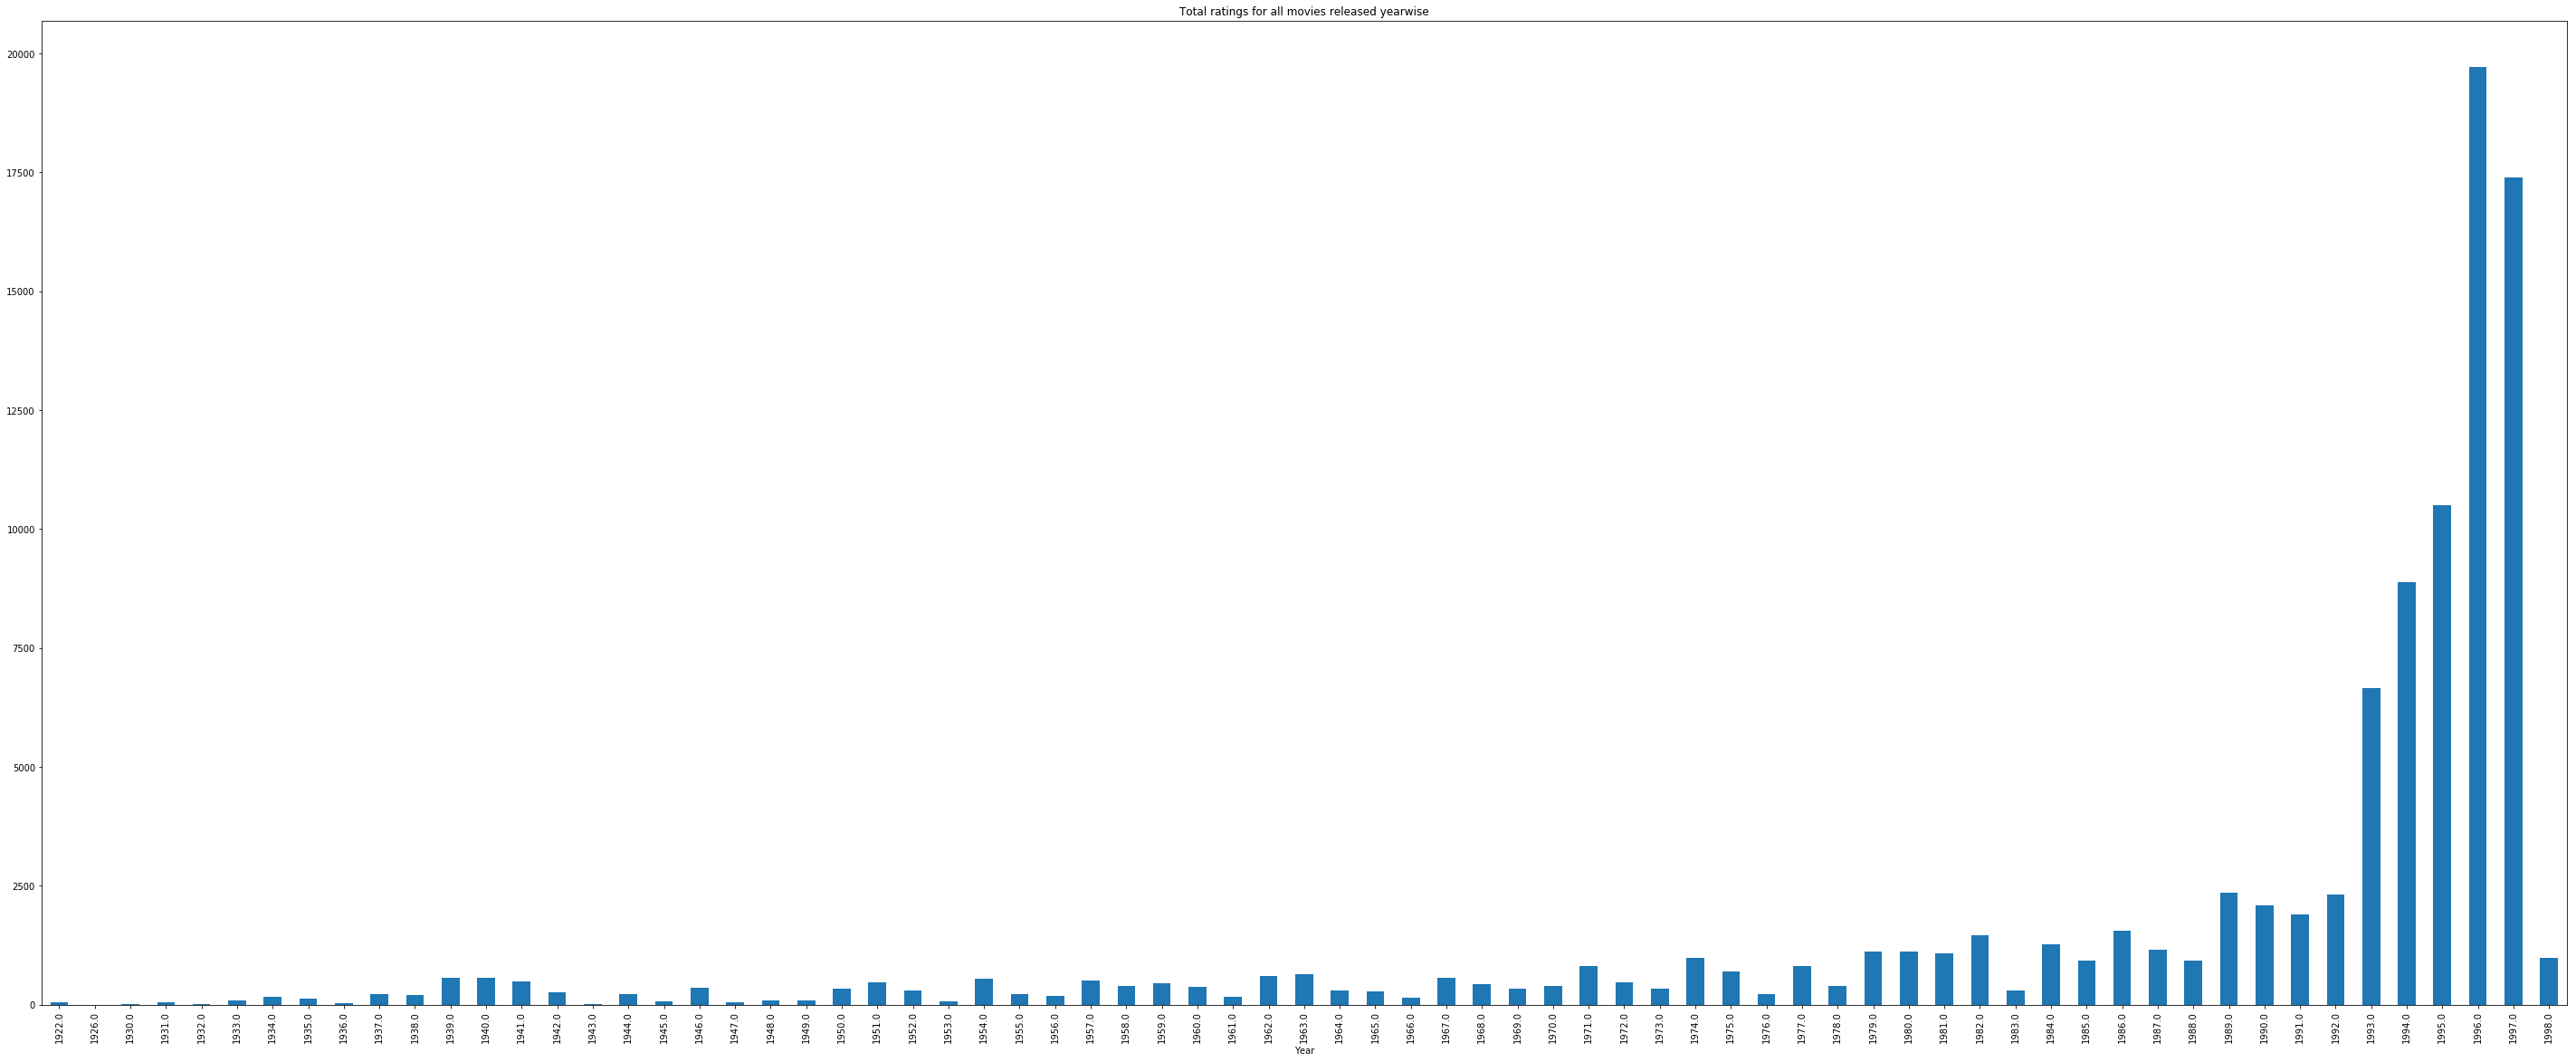

In [252]:
final.groupby('Year').Rating.agg('count').plot(kind='bar', title='Total ratings for all movies released yearwise',
                                               figsize=(50,20))

Age group vs rating count

## Total ratings grouped by age

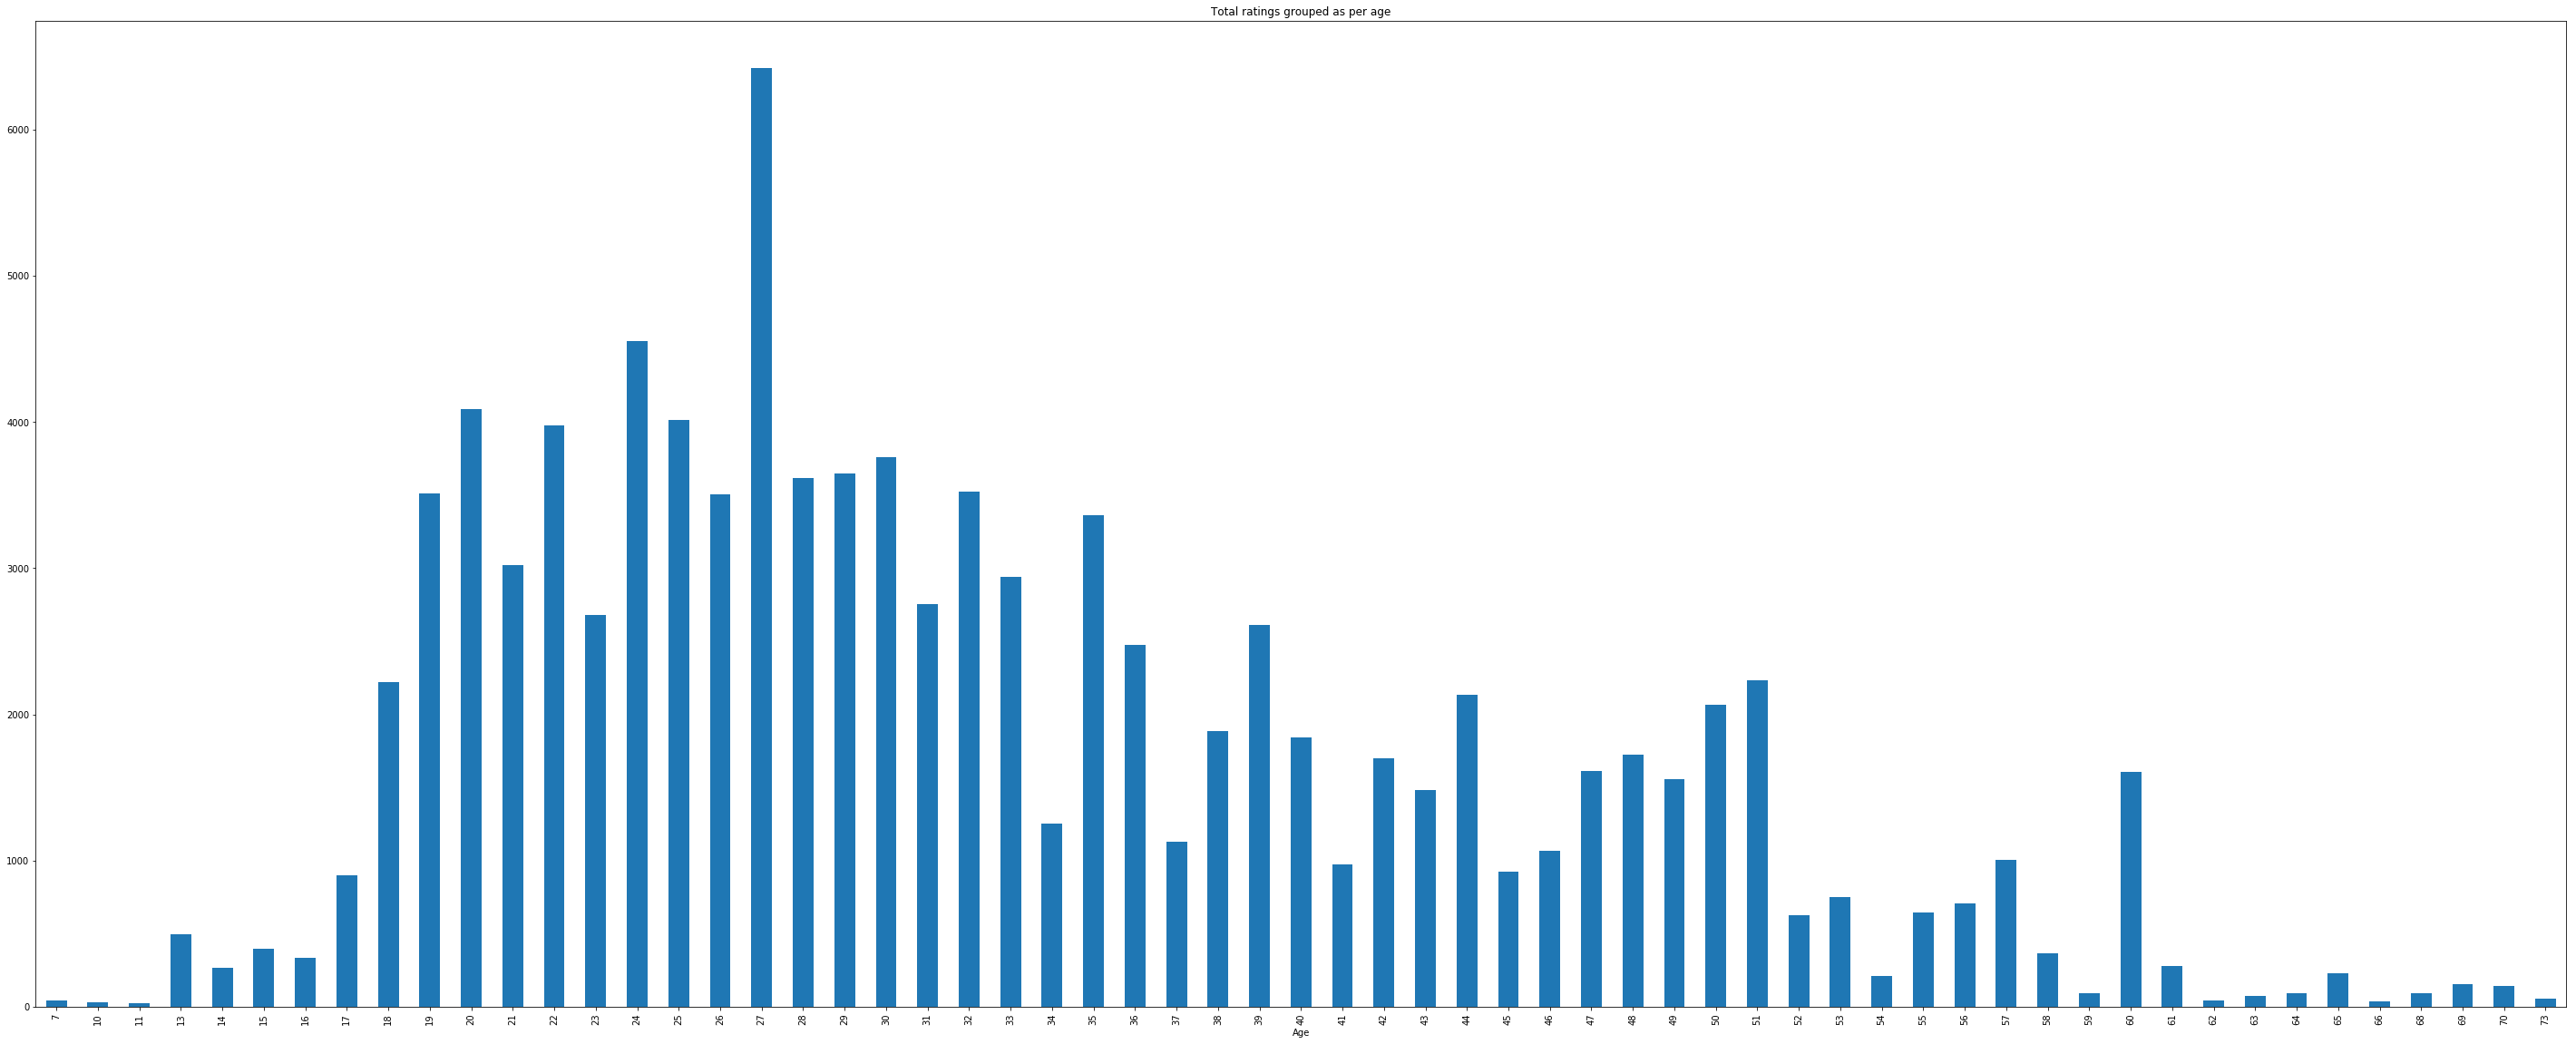

In [253]:
final.groupby('Age').Rating.agg('count').plot(kind='bar', title='Total ratings grouped as per age',figsize=(50,20))

## Total ratings given by people in age group 20-40 grouped by gender

Dropping columns to obtain the required dataset

In [254]:
final.drop('release_date', axis=1, inplace=True)

Creating a new array to store the age of all the participants

In [255]:
age = []
age = final.Age.unique()
age_sorted = []
age_sorted = np.sort(age,axis=-1, kind='quicksort', order=None)

Obtaining the required dataframe from the existing dataframe

In [256]:
colname = ['Action', 'Adventure','Animation', 'Children', 'Comedy', 'Crime', 
         'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical',
         'Mystery', 'Romance', 'Sci-Fi', 'thriller', 'War', 'Western']
df = pd.DataFrame(index=colname, columns=age_sorted)
for l in range(len(colname)):
    listf = final.groupby('Age')[colname[l]].sum().tolist()
    for j in range(len(age_sorted)):
        df.loc[colname[l]:, age_sorted[j]] = listf[j]

Adding various column values for different age groups

In [257]:
df_final = pd.DataFrame(index=colname)
df_final['0-10'] = df[7]+df[10]
df_final['11-20'] = df[11]+df[13]+df[14]+df[15]+df[16]+df[17]+df[18]+df[19]+df[20]
df_final['21-30'] = df[21]+df[22]+df[23]+df[24]+df[25]+df[26]+df[27]+df[28]+df[29]+df[30]
df_final['31-40'] = df[31]+df[32]+df[33]+df[34]+df[35]+df[36]+df[37]+df[38]+df[39]+df[40]
df_final['41-50'] = df[41]+df[42]+df[43]+df[44]+df[45]+df[46]+df[47]+df[48]+df[49]+df[50]
df_final['51-60'] = df[51]+df[52]+df[53]+df[54]+df[55]+df[56]+df[57]+df[58]+df[59]+df[60]
df_final['61-70'] = df[61]+df[62]+df[63]+df[64]+df[65]+df[66]+df[68]+df[69]+df[70]
df_final['70+'] = df[73]

Plotting the graph for total ratings of a genre rated as per age group

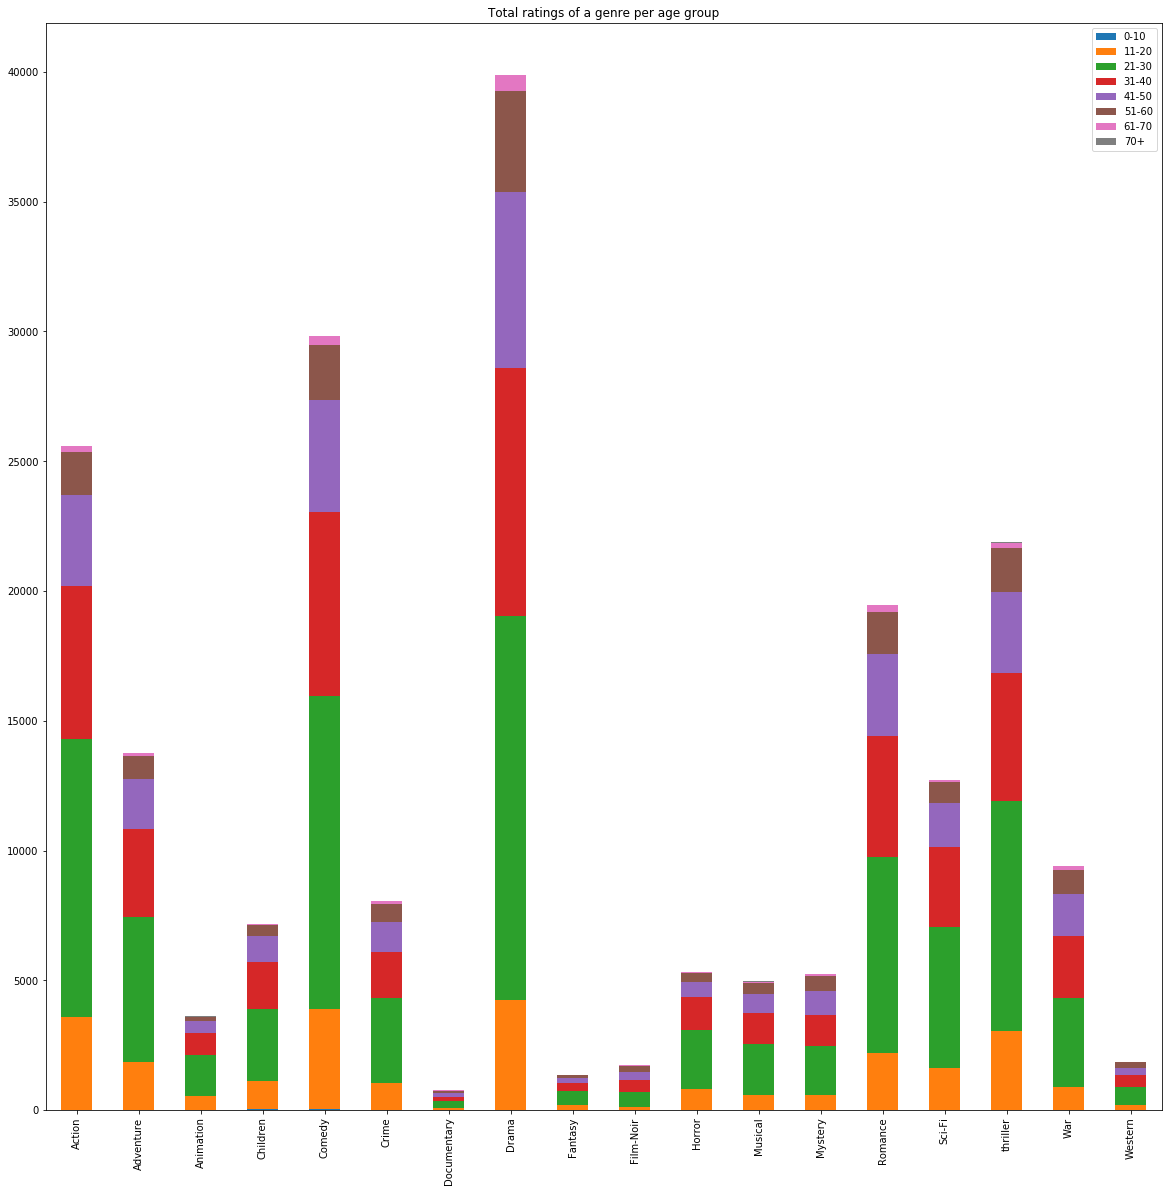

In [258]:
df_final.plot(title='Total ratings of a genre per age group', kind = 'bar',stacked=True, figsize=(20,20))

## Total ratings between age group 20-40 by gender on genre

Creating the dataframe for ratings between age group 20-40

In [259]:
sorted_df = final.sort('Age')
sorted_df.drop(['User_id', 'Item ID', 'Rating', 'Profession','Year'], axis=1,inplace=True)
age_sorted_df = sorted_df[(sorted_df.Age >20) & (sorted_df.Age <= 40)]
age_sorted_df.drop(['Age'], axis=1, inplace=True)
age_sorted_df.reset_index(inplace=True)
age_sorted_df.drop('index',axis=1,inplace=True)

/home/user/Stackroute/p3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/home/user/Stackroute/p3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/user/Stackroute/p3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Grouping the dataframe by gender to obtain the sum of ratings

In [260]:
tempdf = age_sorted_df.groupby('Gender').sum()

Changing the dataframe to the required format

In [261]:
final = tempdf.T

Plotting the graph Age Group 20-40, grouped by gender versus total ratings in that age group

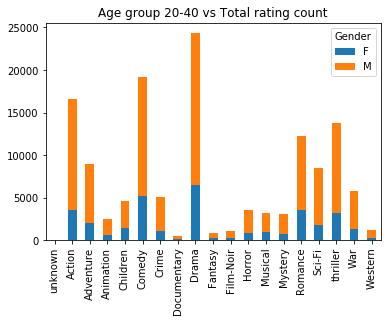

In [262]:
final.plot(kind='bar', title='Age group 20-40 vs Total rating count',stacked=True)